<a href="https://colab.research.google.com/github/danielpatrickhug/kernel-trick/blob/main/metric_space_analysis_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [31]:
import numpy as np

# Initialize an embedding set of vectors sampled from a lognormal distribution
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000).reshape(100, 10)

# Create a kernel using np.matmul(A, A.T)
K = np.matmul(s, s.T)

# Check symmetry
symmetry = np.allclose(K, K.T)
print(f'Symmetry: {symmetry}')

# Check positive definiteness
eigenvalues = np.linalg.eigvals(K)
positive_definite = np.all(eigenvalues > 0)
print(f'Positive definite: {positive_definite}')

# Check triangle inequality
def check_triangle_inequality(K):
    num_rows, num_cols = K.shape
    for i in range(num_rows):
        for j in range(num_cols):
            for k in range(num_cols):
                if K[i][j] > K[i][k] + K[k][j]:
                    return False
    return True

triangle_inequality = check_triangle_inequality(K)
print(f'Triangle inequality: {triangle_inequality}')


Symmetry: True
Positive definite: False
Triangle inequality: True


In [12]:
import numpy as np
from scipy.spatial.distance import cdist

# Initialize an embedding set of vectors sampled from a lognormal distribution
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000).reshape(100, 10)

# Create a positive-definite kernel using the Gaussian RBF
gamma = 0.1  # gamma is a hyperparameter that needs to be set; it controls the width of the Gaussian
sq_dists = cdist(s, s, 'sqeuclidean')  # squared Euclidean distance between each pair of points
K = np.exp(-gamma * sq_dists)

# Check symmetry
symmetry = np.allclose(K, K.T)
print(f'Symmetry: {symmetry}')

# Check positive definiteness
eigenvalues = np.linalg.eigvals(K)
positive_definite = np.all(eigenvalues > 0)
print(f'Positive definite: {positive_definite}')

triangle_inequality = check_triangle_inequality(K)
print(f'Triangle inequality: {triangle_inequality}')


Symmetry: True
Positive definite: True
Triangle inequality: True


In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an embedding set of vectors sampled from a lognormal distribution
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000).reshape(100, 10)

# Create a kernel using cosine similarity
K = cosine_similarity(s)

# Check symmetry
symmetry = np.allclose(K, K.T)
print(f'Symmetry: {symmetry}')

# Check positive definiteness (or semi-definiteness in the case of cosine similarity)
eigenvalues = np.linalg.eigvals(K)
positive_semi_definite = np.all(eigenvalues >= 0)
print(f'Positive semi-definite: {positive_semi_definite}')


triangle_inequality = check_triangle_inequality(K)
print(f'Triangle inequality: {triangle_inequality}')


Symmetry: True
Positive semi-definite: False
Triangle inequality: True


In [10]:
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist


# Initialize an embedding set of vectors sampled from a lognormal distribution
m, n = 100, 10 # dimensions
mu, sigma = 0, 0.1 # mean and standard deviation

s = []
for _ in range(m):
    row = [random.lognormvariate(mu, sigma) for _ in range(n)]
    s.append(row)

s = np.array(s)

# Test for 3 kernels: cosine similarity, Gaussian RBF and dot product
kernels = ['cosine', 'gaussian', 'dot']

for kernel in kernels:
    print(f'Kernel: {kernel}')
    if kernel == 'cosine':
        K = cosine_similarity(s)
    elif kernel == 'gaussian':
        gamma = -0.5
        d = n  # dimensionality of the data
        normalization_constant = 1 / ((2 * np.pi) ** (d / 2))
        sq_dists = cdist(s, s, 'sqeuclidean')
        K = normalization_constant * np.exp(gamma * sq_dists)
    else:  # dot product
        K = np.matmul(s, s.T)

    # Check symmetry
    symmetry = np.allclose(K, K.T)
    print(f'  Symmetry: {symmetry}')

    # Check positive definiteness
    eigenvalues = np.linalg.eigvals(K)
    if kernel == 'cosine':
        positive_semi_definite = np.all(eigenvalues >= -1e-8)
        print(f'  Positive semi-definite: {positive_semi_definite}')
    else:
        positive_definite = np.all(eigenvalues > 0)
        print(f'  Positive definite: {positive_definite}')

    # Check triangle inequality
    triangle_inequality = check_triangle_inequality(K)
    print(f'  Triangle inequality: {triangle_inequality}\n')


Kernel: cosine
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: True

Kernel: gaussian
  Symmetry: True
  Positive definite: True
  Triangle inequality: True

Kernel: dot
  Symmetry: True
  Positive definite: False
  Triangle inequality: True



Kernel: cosine
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: True

  Mean: 0.9906518269908342
  Median: 0.9914127440373217
  Variance: 2.2389143928312047e-05
  Distribution of Similarities:


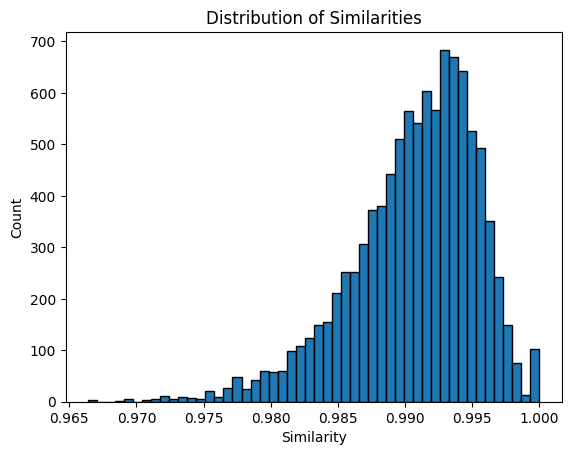

  Condition Number: (990657733189.9938+0j)
  Rank: 10

Kernel: gaussian
  Symmetry: True
  Positive definite: True
  Triangle inequality: True

  Mean: 0.978975803301283
  Median: 0.9804185532333733
  Variance: 0.00010305387192461976
  Distribution of Similarities:


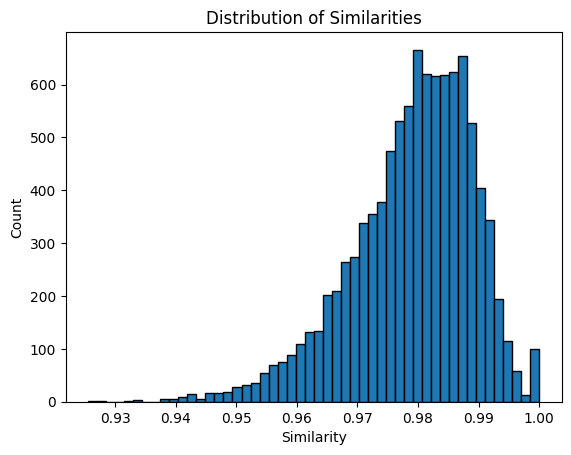

  Condition Number: 1704260909.7184708
  Rank: 100

Kernel: dot
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: True

  Mean: 10.20064223212487
  Median: 10.187870474462361
  Variance: 0.19980466917510042
  Distribution of Similarities:


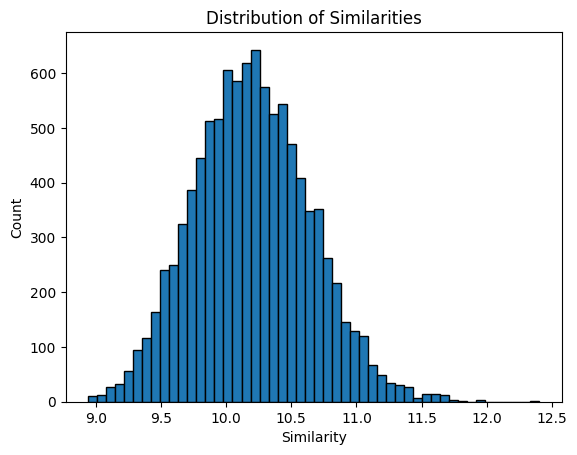

  Condition Number: (10210375036969.57+0j)
  Rank: 10



In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.linalg import svdvals

# Function to check the triangle inequality
def check_triangle_inequality(K):
    return np.all(K <= K[:, :, None] + K[:, None, :])

# Function to calculate centrality measures
def calculate_centrality_measures(K):
    mean_val = np.mean(K)
    median_val = np.median(K)
    var_val = np.var(K)
    return mean_val, median_val, var_val

# Function to plot distribution of similarities
def plot_distribution(K):
    plt.hist(K.ravel(), bins=50, edgecolor='k')
    plt.title('Distribution of Similarities')
    plt.xlabel('Similarity')
    plt.ylabel('Count')
    plt.show()

# Function to calculate eigenvalues and condition number
def calculate_eigenvalues_condition(K):
    eigenvalues = np.linalg.eigvals(K)
    min_eigenvalue = np.min(eigenvalues)
    if min_eigenvalue < 1e-10:
        min_eigenvalue = 1e-10  # Handling small eigenvalues
    condition_number = np.max(eigenvalues) / min_eigenvalue
    return eigenvalues, condition_number

# Function to calculate rank of the kernel matrix
def calculate_rank(K):
    sing_values = svdvals(K)
    rank = np.sum(sing_values > 1e-10)
    return rank

# Initialize an embedding set of vectors sampled from a lognormal distribution
m, n = 100, 10  # dimensions
mu, sigma = 0, 0.1  # mean and standard deviation

s = np.random.lognormal(mu, sigma, (m, n))

# Test for 3 kernels: cosine similarity, Gaussian RBF, and dot product
kernels = ['cosine', 'gaussian', 'dot']

for kernel in kernels:
    print(f'Kernel: {kernel}')
    if kernel == 'cosine':
        K = cosine_similarity(s)
    elif kernel == 'gaussian':
        gamma = 0.1
        sq_dists = cdist(s, s, 'sqeuclidean')
        K = np.exp(-gamma * sq_dists)
    else:  # dot product
        K = np.dot(s, s.T)
    
    # Check symmetry
    symmetry = np.allclose(K, K.T)
    print(f'  Symmetry: {symmetry}')

    # Check positive definiteness
    eigenvalues = np.linalg.eigvals(K)
    if kernel == 'cosine' or kernel == 'dot':
        positive_semi_definite = np.all(eigenvalues >= -1e-8)
        print(f'  Positive semi-definite: {positive_semi_definite}')
    else:
        positive_definite = np.all(eigenvalues > 0)
        print(f'  Positive definite: {positive_definite}')

    # Check triangle inequality
    triangle_inequality = check_triangle_inequality(K)
    print(f'  Triangle inequality: {triangle_inequality}\n')

    # Centrality measures
    mean_val, median_val, var_val = calculate_centrality_measures(K)
    print(f'  Mean: {mean_val}')
    print(f'  Median: {median_val}')
    print(f'  Variance: {var_val}')

    # Distribution of similarities
    print('  Distribution of Similarities:')
    plot_distribution(K)

    # Eigenvalues and condition number
    eigenvalues, condition_number = calculate_eigenvalues_condition(K)
    print(f'  Condition Number: {condition_number}')

    # Rank of the kernel matrix
    rank = calculate_rank(K)
    print(f'  Rank: {rank}\n')


Kernel: cosine
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: True

  Mean: 0.9916184814944833
  Median: 0.9920899403196654
  Variance: 1.4349250922205603e-05
  Distribution of Similarities:


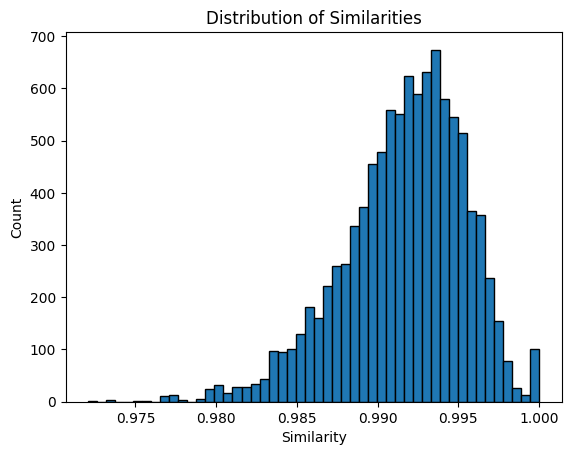

  Condition Number: (991621498867.5697+0j)
  Rank: 10

Kernel: gaussian
  Symmetry: True
  Positive definite: True
  Triangle inequality: True

  Mean: 0.9810835045774445
  Median: 0.9818140333096387
  Variance: 6.429969293595741e-05
  Distribution of Similarities:


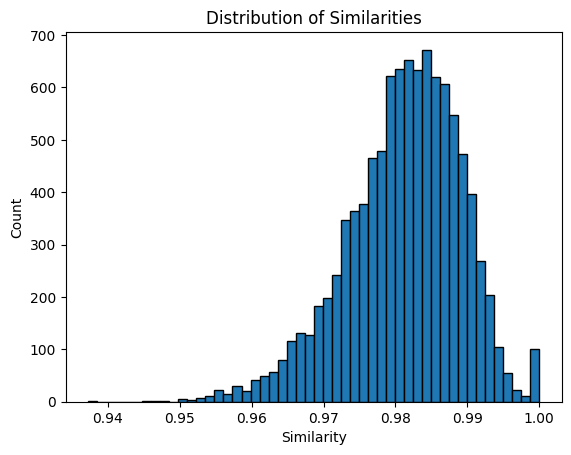

  Condition Number: 1034074415.8583349
  Rank: 100

Kernel: dot
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: True

  Mean: 10.093038442529002
  Median: 10.06735329131471
  Variance: 0.20564278171206674
  Distribution of Similarities:


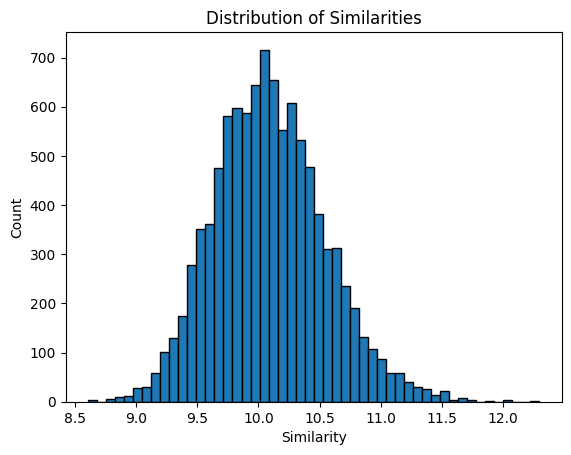

  Condition Number: (10103177519550.508+0j)
  Rank: 10

Kernel: polynomial
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: True

  Mean: 123.26114466913833
  Median: 122.48630887661494
  Variance: 102.74058382906041
  Distribution of Similarities:


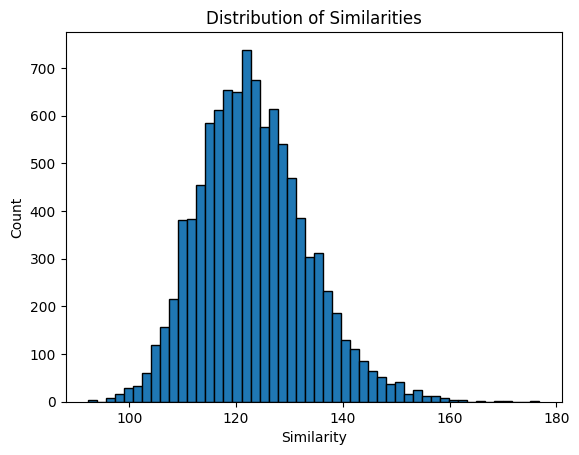

  Condition Number: (123675445776658.2+0j)
  Rank: 66

Kernel: abel
  Symmetry: True
  Positive definite: True
  Triangle inequality: False

  Mean: 0.6566001099405153
  Median: 0.6515453586241571
  Variance: 0.004656472449186359
  Distribution of Similarities:


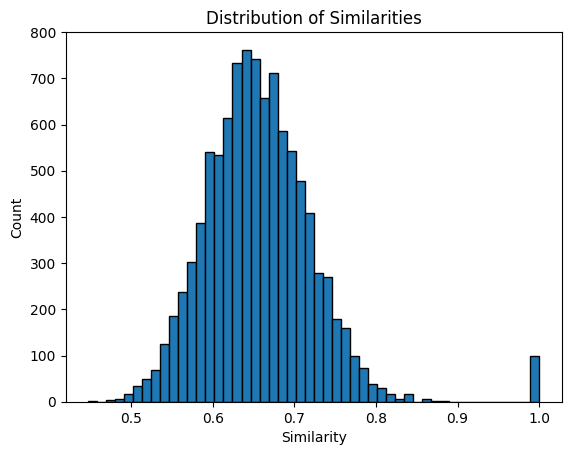

  Condition Number: 705.4776528069171
  Rank: 100



In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.linalg import svdvals
from scipy.special import gamma
from scipy.special import jv

# Function to check the triangle inequality
def check_triangle_inequality(K):
    return np.all(K <= K[:, :, None] + K[:, None, :])

# Function to calculate centrality measures
def calculate_centrality_measures(K):
    mean_val = np.mean(K)
    median_val = np.median(K)
    var_val = np.var(K)
    return mean_val, median_val, var_val

# Function to plot distribution of similarities
def plot_distribution(K):
    plt.hist(K.ravel(), bins=50, edgecolor='k')
    plt.title('Distribution of Similarities')
    plt.xlabel('Similarity')
    plt.ylabel('Count')
    plt.show()

# Function to calculate eigenvalues and condition number
def calculate_eigenvalues_condition(K):
    eigenvalues = np.linalg.eigvals(K)
    min_eigenvalue = np.min(eigenvalues)
    if min_eigenvalue < 1e-10:
        min_eigenvalue = 1e-10  # Handling small eigenvalues
    condition_number = np.max(eigenvalues) / min_eigenvalue
    return eigenvalues, condition_number

# Function to calculate rank of the kernel matrix
def calculate_rank(K):
    sing_values = svdvals(K)
    rank = np.sum(sing_values > 1e-10)
    return rank

# Initialize an embedding set of vectors sampled from a lognormal distribution
m, n = 100, 10  # dimensions
mu, sigma = 0, 0.1  # mean and standard deviation

s = np.random.lognormal(mu, sigma, (m, n))

# Test for 7 kernels: cosine similarity, Gaussian RBF, dot product, linear, polynomial, Laplacian, Abel
kernels = ['cosine', 'gaussian', 'dot', 'polynomial', 'abel']

for kernel in kernels:
    print(f'Kernel: {kernel}')
    if kernel == 'cosine':
        K = cosine_similarity(s)
    elif kernel == 'gaussian':
        gamma = 0.1
        sq_dists = cdist(s, s, 'sqeuclidean')
        K = np.exp(-gamma * sq_dists)
    elif kernel == 'dot':
        K = np.dot(s, s.T)
    elif kernel == 'polynomial':
        r = 1.0
        n = 2
        K = np.power(np.dot(s, s.T) + r, n)
    elif kernel == 'laplacian':
        alpha = 1.0
        K = np.exp(-alpha * cdist(s, s))
    elif kernel == 'abel':
        alpha = 1.0
        K = np.exp(-alpha * np.abs(cdist(s, s)))
    else:
        print(f'Kernel "{kernel}" not implemented.')
        continue

    # Check symmetry
    symmetry = np.allclose(K, K.T)
    print(f'  Symmetry: {symmetry}')

    # Check positive definiteness
    eigenvalues = np.linalg.eigvals(K)
    if kernel in ['cosine', 'dot',  'polynomial']:
        positive_semi_definite = np.all(eigenvalues >= -1e-8)
        print(f'  Positive semi-definite: {positive_semi_definite}')
    else:
        positive_definite = np.all(eigenvalues > 0)
        print(f'  Positive definite: {positive_definite}')

    # Check triangle inequality
    triangle_inequality = check_triangle_inequality(K)
    print(f'  Triangle inequality: {triangle_inequality}\n')

    # Centrality measures
    mean_val, median_val, var_val = calculate_centrality_measures(K)
    print(f'  Mean: {mean_val}')
    print(f'  Median: {median_val}')
    print(f'  Variance: {var_val}')

    # Distribution of similarities
    print('  Distribution of Similarities:')
    plot_distribution(K)

    # Eigenvalues and condition number
    eigenvalues, condition_number = calculate_eigenvalues_condition(K)
    print(f'  Condition Number: {condition_number}')

    # Rank of the kernel matrix
    rank = calculate_rank(K)
    print(f'  Rank: {rank}\n')

#Sbert

In [ ]:
!pip install sentence-transformers

In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from scipy.linalg import svdvals
from sentence_transformers import SentenceTransformer


# Create SBERT model and load pre-trained weights
model = SentenceTransformer('all-MiniLM-L6-v2')

In [41]:


# Example sentences
sentences = [
    'I enjoy taking long walks on the beach.',
    'The sun is shining brightly today.',
    'I love eating ice cream.',
    'Reading books is my favorite pastime.',
    'Traveling to new places is always exciting.',
    'I like to play basketball with my friends.',
    'Pizza is my go-to comfort food.',
    'Learning new things is a never-ending journey.',
    'Nature always brings me a sense of peace.',
    'Music has the power to uplift my mood.',
    'I find joy in spending time with my family.',
    'Exploring different cultures is enriching.',
    'Cooking is a creative and therapeutic activity for me.',
    'The beauty of a sunset is captivating.',
    'Laughter is the best medicine.',
    'I appreciate the little things in life.',
    'Exercise helps me stay physically and mentally fit.',
    'Writing allows me to express my thoughts and emotions.',
    'Friendship is a treasure to be cherished.',
    'A good cup of coffee starts my day off right.'
]


# Embed sentences using SBERT
embeddings = model.encode(sentences)

# Test for 3 kernels: cosine similarity, Gaussian RBF, and dot product
kernels = ['cosine', 'gaussian', 'dot']

for kernel in kernels:
    print(f'Kernel: {kernel}')
    if kernel == 'cosine':
        K = cosine_similarity(embeddings)
    elif kernel == 'gaussian':
        gamma = 0.1
        sq_dists = cdist(embeddings, embeddings, 'sqeuclidean')
        K = np.exp(-gamma * sq_dists)
    else:  # dot product
        K = np.dot(embeddings, embeddings.T)

    # Check symmetry
    symmetry = np.allclose(K, K.T)
    print(f'  Symmetry: {symmetry}')

    # Check positive definiteness
    eigenvalues = np.linalg.eigvals(K)
    if kernel in ['cosine', 'dot',  'polynomial']:
        positive_semi_definite = np.all(eigenvalues >= -1e-8)
        print(f'  Positive semi-definite: {positive_semi_definite}')
    else:
        positive_definite = np.all(eigenvalues > 0)
        print(f'  Positive definite: {positive_definite}')

    # Check triangle inequality
    triangle_inequality = check_triangle_inequality(K)
    print(f'  Triangle inequality: {triangle_inequality}\n')

    # Centrality measures
    mean_val, median_val, var_val = calculate_centrality_measures(K)
    print(f'  Mean: {mean_val}')
    print(f'  Median: {median_val}')
    print(f'  Variance: {var_val}')

    # Distribution of similarities
    #print('  Distribution of Similarities:')
    #plot_distribution(K)

    # Eigenvalues and condition number
    eigenvalues, condition_number = calculate_eigenvalues_condition(K)
    print(f'  Condition Number: {condition_number}')

    # Rank of the kernel matrix
    rank = calculate_rank(K)
    print(f'  Rank: {rank}\n')


Kernel: cosine
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: False

  Mean: 0.28773584961891174
  Median: 0.24627673625946045
  Variance: 0.036066342145204544
  Condition Number: 21.65114402770996
  Rank: 20

Kernel: gaussian
  Symmetry: True
  Positive definite: True
  Triangle inequality: True

  Mean: 0.867874970804533
  Median: 0.860067296598541
  Variance: 0.001199369971402836
  Condition Number: 311.12421526621404
  Rank: 20

Kernel: dot
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: False

  Mean: 0.28773584961891174
  Median: 0.24627670645713806
  Variance: 0.036066342145204544
  Condition Number: 21.651145935058594
  Rank: 20



In [34]:
from transformers import BertModel, BertTokenizer
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
import torch
# Example sentences
sentences = [
    'I enjoy taking long walks on the beach.',
    'The sun is shining brightly today.',
    'I love eating ice cream.',
    'Reading books is my favorite pastime.',
    'Traveling to new places is always exciting.',
    'I like to play basketball with my friends.',
    'Pizza is my go-to comfort food.',
    'Learning new things is a never-ending journey.',
    'Nature always brings me a sense of peace.',
    'Music has the power to uplift my mood.',
    'I find joy in spending time with my family.',
    'Exploring different cultures is enriching.',
    'Cooking is a creative and therapeutic activity for me.',
    'The beauty of a sunset is captivating.',
    'Laughter is the best medicine.',
    'I appreciate the little things in life.',
    'Exercise helps me stay physically and mentally fit.',
    'Writing allows me to express my thoughts and emotions.',
    'Friendship is a treasure to be cherished.',
    'A good cup of coffee starts my day off right.'
]


# Tokenize and encode sentences using BERT tokenizer
input_ids = []
for sentence in sentences:
    encoded = tokenizer.encode(sentence, add_special_tokens=True)
    input_ids.append(encoded)

# Pad sequences to a fixed length
max_length = max(len(ids) for ids in input_ids)
input_ids = [ids + [0] * (max_length - len(ids)) for ids in input_ids]

# Convert input_ids to a tensor
input_ids = torch.tensor(input_ids)

# Generate BERT embeddings
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs[0].numpy()

# Reshape embeddings to 2D
embeddings = embeddings.reshape(embeddings.shape[0], -1)

# Test for 3 kernels: cosine similarity, Gaussian RBF, and dot product
kernels = ['cosine', 'gaussian', 'dot']

for kernel in kernels:
    print(f'Kernel: {kernel}')
    if kernel == 'cosine':
        K = cosine_similarity(embeddings)
    elif kernel == 'gaussian':
        gamma = 0.1
        sq_dists = cdist(embeddings, embeddings, 'sqeuclidean')
        K = np.exp(-gamma * sq_dists)
    else:  # dot product
        K = np.dot(embeddings, embeddings.T)
    
    # Check symmetry
    symmetry = np.allclose(K, K.T)
    print(f'  Symmetry: {symmetry}')

    # Check positive definiteness
    eigenvalues = np.linalg.eigvals(K)
    if kernel in ['cosine', 'dot',  'polynomial']:
        positive_semi_definite = np.all(eigenvalues >= -1e-8)
        print(f'  Positive semi-definite: {positive_semi_definite}')
    else:
        positive_definite = np.all(eigenvalues > 0)
        print(f'  Positive definite: {positive_definite}')

    # Check triangle inequality
    triangle_inequality = check_triangle_inequality(K)
    print(f'  Triangle inequality: {triangle_inequality}\n')

    # Centrality measures
    mean_val, median_val, var_val = calculate_centrality_measures(K)
    print(f'  Mean: {mean_val}')
    print(f'  Median: {median_val}')
    print(f'  Variance: {var_val}')

    # Distribution of similarities
    #print('  Distribution of Similarities:')
    #plot_distribution(K)

    # Eigenvalues and condition number
    eigenvalues, condition_number = calculate_eigenvalues_condition(K)
    print(f'  Condition Number: {condition_number}')

    # Rank of the kernel matrix
    rank = calculate_rank(K)
    print(f'  Rank: {rank}\n')

Kernel: cosine
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: False

  Mean: 0.447346955537796
  Median: 0.4135924279689789
  Variance: 0.0260885301977396
  Condition Number: 42.57209014892578
  Rank: 20

Kernel: gaussian
  Symmetry: True
  Positive definite: True
  Triangle inequality: False

  Mean: 0.05
  Median: 4.1397370257723625e-138
  Variance: 0.04749999999999998
  Condition Number: (1.0000000000000024+0j)
  Rank: 20

Kernel: dot
  Symmetry: True
  Positive semi-definite: True
  Triangle inequality: False

  Mean: 1203.8599853515625
  Median: 1092.7447509765625
  Variance: 188870.796875
  Condition Number: 37.959285736083984
  Rank: 20

